# Lab 3 home assignment: Distributional semantics

---

In [5]:
import sys
import numpy as np
sys.path.append("../../src")
import distribsem

%matplotlib notebook

from nltk.book import text1 as moby_dick, text2 as sense_and_sensibility

# These lines filter out some characters from the texts to make it less noisy
moby_dick = distribsem.filter_text(moby_dick)
sense_and_sensibility = distribsem.filter_text(sense_and_sensibility)

### Task 1

In this first task you will perform basic calculations with vectors similar to what we did in the Part 3 of the class material. **Use NumPy arrays for all of the vectors in this assignment!**

In the code cell below, solve the following four subtasks:

1. Create two vectors vectors of length 10 where each element is the number 1.0. Add the vectors together and print out the result. *Hint: np.ones*

2. Create two vectors of length 5 where each element is the number 1.0, multiply one of the vectors by a scalar 2 and the other vector with a scalar 3. Add the vectors together and print out the result.

3. Create two vectors `a` and `b` without using `np.ones` or `np.zeros` so that when `b` is subtracted from `a`, the result is the vector: 
    
    `[1, 1, 2, 3, 5, 8]`
    
    You can choose your two vectors freely. Print out the vectors in the program.

4. Calculate and print out the weighted average of the following vectors:
    
    `v1 = [1, 3, 5]     v2 = [1, 4, 7]     v3 = [1, 5, 8]`
    
    The weights should be `2`, `3` and `1` for `v1`, `v2`, and `v3` respectively.
    
    *Hint: To calculate a weighted average, instead of dividing by the number of vectors like in regular averaging, you need to divide by the sum of the weights.*

In [ ]:
# 1
# TODO


# 2
# TODO


# 3
# TODO


# 4
# TODO


### Task 2

Your second task is to study the contexts of different words, keeping in mind the ideas about learning word embeddings from corpora. You can read slides 18-26 from lecture 2 if you need a refresher on this. We also remind you of some basics here.

When learning word embeddings from a corpus, there are a few parameters we need to decide on beforehand. First of all, we need to define a window size for the context we want to use. For example, a window of 4 words means we will consider as context the four words before and the four words after the target word.

We also need to decide the dimensionality of the final vectors. In our case this means the size of the context vocabulary we want to take into account. We can decide, for example, to use the 1000 most common words in the corpus as context vocabulary. Consequently, our embeddings will be 1000-dimensional. Any words outside the top 1000 will simply not be taken into account.

In the code cell below, you are given a function `show_kwic` (kwic = **key-word in context**), that you can use to retrieve instances of a word of you choice in a corpus. The example shows the 10 first occurrences of the word *water* in *Moby Dick*, using a window size of 4 and 500 most common words as context vocabulary.

---

**Your task:** Pick **one pair** of *closely related* words (for example *sky* and *cloud* can be considered closely related) and **one pair** of *unrelated* words (for example *house* and *jump*). Study the contexts of the words and see how/whether the (un)relatedness is manifested in the contexts. Answer as comments in the code cell.

You should also try different values for `dimensionality` and `window_size`. `dimensionality` controls the size of the context vocabulary (using top frequent words) and `window_size` controls the window size of the context. Try `dimensionality` values in different ranges (tens, hundreds, thousands) and vary the window size for example between 1-10. Write as comments in the code cell answers to the following questions:

1. How does dimensionality affect how easy it is to see the (un)relatedness of the words?
2. How does window size affect how easy it is to see the (un)relatedness of the words?
3. What kinds of characteristics do you think the embeddings capture with small window sizes and dimensionalities?
3. What kinds of characteristics do you think the embeddings capture with large window sizes and dimensionalities?

You can use either the text `moby_dick` or `sense_and_sensibility`.

**Note:** *Words outside the top "dimensionality" frequent words are replaced with UNKs in the kwics.*

---

In [2]:
dimensionality = 500
window_size = 4
show_n_occurrences = 10
word = "water"

distribsem.show_kwic(
    text=moby_dick,
    word=word,
    window=window_size,
    dimensionality=dimensionality,
    show_n=show_n_occurrences
)

                                       in a sea of  water   and have a                                       
                               <UNK> or <UNK> feet  water  . <UNK> <UNK> S                                   
                                <UNK> <UNK> up the  water  through their <UNK> and                           
                                    . So fire with  water  to <UNK>  The                                     
                                 main <UNK> of the  water  <UNK> at <UNK> <UNK>                              
                                    <UNK>  and the  water  <UNK> in its <UNK>                                
                                 by <UNK> into the  water  when they saw the                                 
                              <UNK> <UNK> from the  water   and <UNK> up                                     
                                   at the <UNK> of  water  <UNK> there . <UNK>                               
          

### Task 3

In this third task we will continue the theme of word embeddings and contexts. This time we will study embeddings trained on two different texts. The texts we will use are the familiar *Moby Dick* (variable `moby_dick`) and *Sense and Sensibility* (variable `sense_and_sensibility`). 

In the code cell below we train embeddings for a set of words on both texts (function `create_vectors_shared`). This will result in two embedding matrices (`M_moby_shared` and `M_sense_shared`) as well as a mapping from words to their row indices (`mapping_shared`). The vocabulary size and embedding dimensionalities are abit weird because of the way they are restricted to get comparable embeddings. Don't worry about the fact that the values don't match the ones supplied to the function.

Run the code cell and read on.

In [17]:
M_moby_shared, M_sense_shared, mapping_shared = distribsem.create_vectors_shared(
    max_vocab_size=10000,
    min_dimensionality=1000,
    window_size=4,
    text1=moby_dick,
    text2=sense_and_sensibility
)

Final vocabulary size: 3531
Final context vocabulary size (embedding dimensionality): 1521


In the code cell below we show how you can visualize the word embeddings. Embeddings trained on different texts are color-coded. 

**3.1: Your first task** is to find **two** words that have relatively similar embeddings in the two texts (meaning the two embeddings for *one word* are close to each other in the figure) as well as **two** words that have completely different embeddings (again, cases where the same word gets two very different embeddings in the two texts). Write down the four words as comments in the code cell. 

**Do not use the words *water* or *man* that have been supplied.** Also, don't change the window size or dimensionality for this task.

Read on to **3.2** after you have done this part of the task.

**Note:** *Use your best judgment on what "relatively close" means. It is hard to find words that have completely identical embeddings or words that have embeddings that are on completely opposite regions of the vector space. If you run the code cell below, you can see two word visualized, "water" and "man". "Water" is a good example of dissimilar embeddings and "man" is an example of a word with two similar embeddings.*

<IPython.core.display.Javascript object>


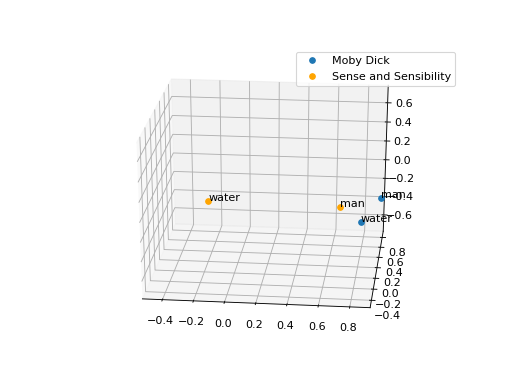

In [24]:
words = "water man".split()

distribsem.plot_two_embeddings(
    words=words,
    embeddings_1=M_moby_shared,
    embeddings_2=M_sense_shared,
    mapping_1=mapping_shared,
    embeddings_1_name="Moby Dick",
    embeddings_2_name="Sense and Sensibility"
)

**3.2: You second task** is to pick **two** words you found in **3.1**: one with similar embeddings and one with dissimilar embeddings. Analyze the contexts of the two words in the two texts, similar to what you did in Task 2. How do the (dis)similarities of the embeddings show in the word contexts in different texts? Again, answer the question in your code. 

You do not need to change the window size of dimensionality in this task.

In [23]:
show_n_occurrences = 10
word = "water"

print("Occurrences in Sense and Sensibility:")
distribsem.show_kwic(
    text=sense_and_sensibility,
    word=word,
    window=4,
    dimensionality=1000,
    show_n=show_n_occurrences
)

print("\nOccurrences in Moby Dick:")
distribsem.show_kwic(
    text=moby_dick,
    word=word,
    window=4,
    dimensionality=1000,
    show_n=show_n_occurrences
)

Occurrences in Sense and Sensibility:
                                 all sent <UNK> by  water  . It <UNK> <UNK>                                  
                                and parties on the  water  were made and <UNK>                               
                                  a <UNK> <UNK> of  water  a <UNK> on which                                  
                            <UNK> <UNK> with <UNK>  water   by one of                                        
                              <UNK> her with <UNK>  water  . <UNK> to him                                    

Occurrences in Moby Dick:
                                       in a sea of  water   and have a                                       
                               <UNK> or <UNK> feet  water  . <UNK> <UNK> S                                   
                                <UNK> <UNK> up the  water  through their <UNK> and                           
                                    . So fire with  wat